In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels 
import seaborn as sns
import scipy.stats as ss
import pylab
import pymysql
import statsmodels.graphics.tsaplots as sgt
import  statsmodels.tsa.stattools as sts 
import datetime as dt


from statsmodels.tsa.seasonal import seasonal_decompose
from sqlalchemy import create_engine
from tqdm import tqdm
from time import sleep
sns.set()
pymysql.install_as_MySQLdb()


In [2]:
engine = create_engine('sqlite:///Binance_daily.db')

In [4]:
symbols = ['BTCUSDT','ETHUSDT', 'ADAUSDT', 'BNBUSDT', 'SOLUSDT']

In [20]:
def qry(symbol):
    df = pd.read_sql(symbol, engine)
    df = df.set_index('Date')
    return pd.DataFrame(df['Close'])

In [36]:
df = qry(symbols[0])

In [37]:
df.head(10)

,Close
Date,
2020-01-01,7200.85
2020-01-02,6965.71
2020-01-03,7344.96
2020-01-04,7354.11
2020-01-05,7358.75
2020-01-06,7758.00
2020-01-07,8145.28
2020-01-08,8055.98
2020-01-09,7817.76


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1248 entries, 2020-01-01 to 2023-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1248 non-null   float64
dtypes: float64(1)
memory usage: 19.5 KB


In [39]:
df.describe()

,Close
count,1248.000000
mean,28410.347732
std,16124.030173
min,4800.000000
25%,15438.427500
50%,24226.985000
75%,41048.405000
max,67525.830000


In [40]:
df.isna().sum()

Close    0
dtype: int64

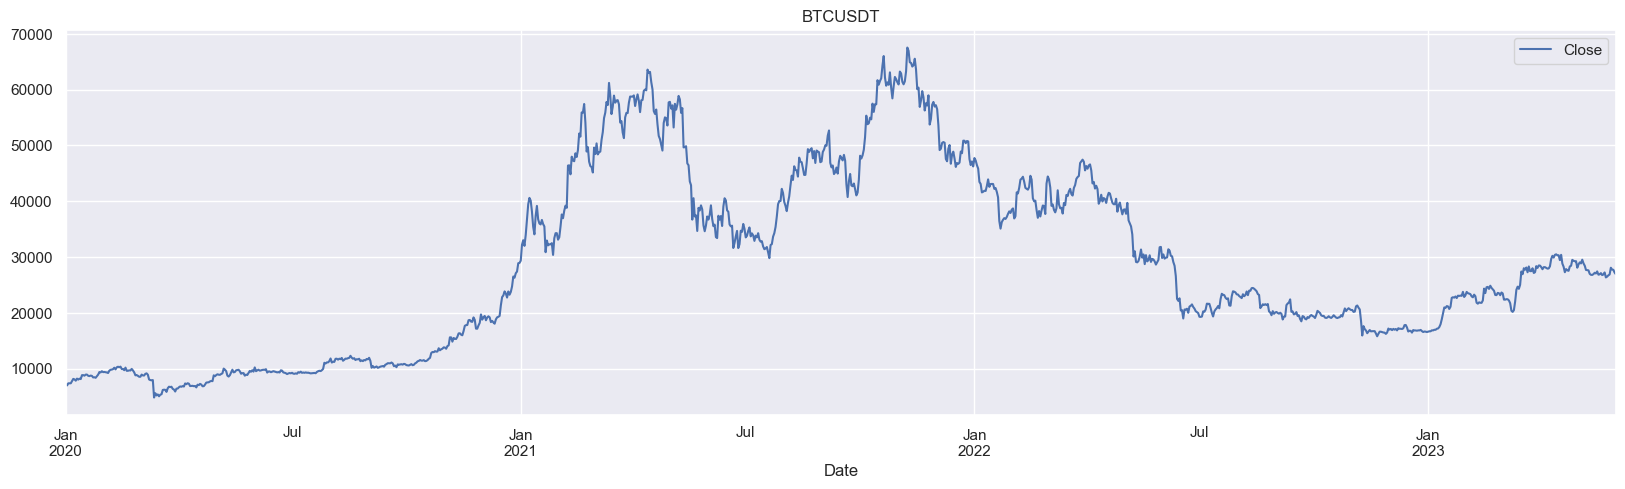

In [41]:
df.plot(figsize=(20, 5), title='BTCUSDT')
plt.show()

## QQ Plot

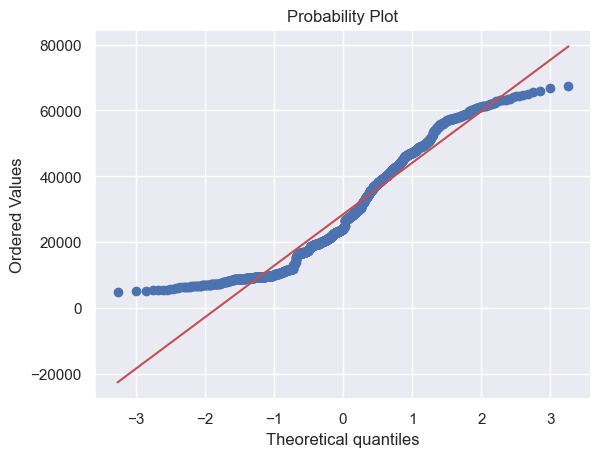

In [42]:
ss.probplot(df.Close, plot = pylab)
pylab.show()

## Test of stationality

In [44]:
sts.adfuller(df.Close)

(-1.6580023352055553,
 0.452870384861726,
 0,
 1247,
 {'1%': -3.4356048614183443,
  '5%': -2.8638605461891617,
  '10%': -2.5680054872544145},
 20891.59300890554)